Asthma should really be related to air quality. If this doesn't work, nothing will.

Asthma data is averaged over the entire year of 2017, spatially divided by 2010 census tract.

In [19]:
import os

import pandas as pd
import geopandas as gpd

from air_brain.data.get_data import DATA_DIR

asthma_file = os.path.join(DATA_DIR, "asthma.csv")
#tract_file = os.path.join(DATA_DIR, "census_tracts.json")
tract_file = os.path.join(DATA_DIR, "tl_2010_42003_tract10", "tl_2010_42003_tract10.shp")

In [10]:
asthma = pd.read_csv(asthma_file)
# convert all numerators to fractions
for col in ["ED_visits", "ED_hosp", "UC_visits", "Asthma_use"]:
    asthma["{}_frac".format(col)] = asthma[col] / asthma.Total_members
asthma

,Census_tract,ED_visits,ED_hosp,UC_visits,Asthma_use,Total_members,ED_visits_frac,ED_hosp_frac,UC_visits_frac,Asthma_use_frac
0,42003010300,2,0,0,6,83,0.024096,0.000000,0.000000,0.072289
1,42003020100,32,19,3,223,2114,0.015137,0.008988,0.001419,0.105487
2,42003020300,0,0,0,2,48,0.000000,0.000000,0.000000,0.041667
3,42003030500,11,3,3,61,422,0.026066,0.007109,0.007109,0.144550
4,42003040200,2,1,1,18,138,0.014493,0.007246,0.007246,0.130435
...,...,...,...,...,...,...,...,...,...,...
393,42003980600,0,0,0,0,5,0.000000,0.000000,0.000000,0.000000
394,42003980700,0,0,0,1,2,0.000000,0.000000,0.000000,0.500000
395,42003981000,0,0,0,0,8,0.000000,0.000000,0.000000,0.000000
396,42003981800,0,0,0,0,13,0.000000,0.000000,0.000000,0.000000


In [6]:
# all 2010 census tracts as polygons
tracts = gpd.read_file(tract_file)
# need to rename tracts to match the asthma file
tracts.rename(columns={"TRACTCE10": "Census_tract"}, inplace=True)
tracts.Census_tract = "42003" + tracts.Census_tract.astype(str)
tracts.Census_tract = tracts.Census_tract.astype(int)
tracts[["Census_tract", "geometry"]]

,Census_tract,geometry
0,42003560500,"POLYGON ((-79.88975 40.43554, -79.88997 40.435..."
1,42003560400,"POLYGON ((-79.88648 40.44009, -79.88648 40.440..."
2,42003552400,"POLYGON ((-79.84286 40.32385, -79.84357 40.325..."
3,42003552300,"POLYGON ((-79.84599 40.34514, -79.84599 40.345..."
4,42003552200,"POLYGON ((-79.87063 40.35539, -79.87038 40.355..."
...,...,...
397,42003562600,"POLYGON ((-80.03294 40.43794, -80.03296 40.437..."
398,42003980000,"POLYGON ((-79.8888 40.48401, -79.88888 40.4840..."
399,42003561900,"POLYGON ((-79.89169 40.47478, -79.89064 40.474..."
400,42003563200,"POLYGON ((-80.00212 40.45813, -80.00215 40.458..."


In [11]:
df = tracts.merge(asthma, on="Census_tract", how="right", validate="1:1")

<Axes: >

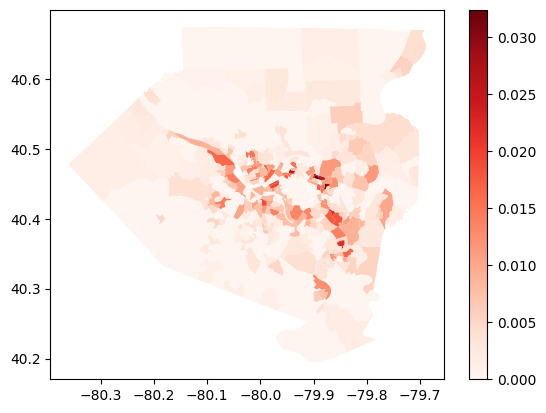

In [18]:
df.plot(column="ED_hosp_frac", legend=True, cmap="Reds")